In [1]:
from sklearn.datasets import load_digits
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
digit = load_digits()
x = digit.data
y = digit.target

In [3]:
x[3]

array([  0.,   0.,   7.,  15.,  13.,   1.,   0.,   0.,   0.,   8.,  13.,
         6.,  15.,   4.,   0.,   0.,   0.,   2.,   1.,  13.,  13.,   0.,
         0.,   0.,   0.,   0.,   2.,  15.,  11.,   1.,   0.,   0.,   0.,
         0.,   0.,   1.,  12.,  12.,   1.,   0.,   0.,   0.,   0.,   0.,
         1.,  10.,   8.,   0.,   0.,   0.,   8.,   4.,   5.,  14.,   9.,
         0.,   0.,   0.,   7.,  13.,  13.,   9.,   0.,   0.])

In [4]:
x.shape , y.shape

((1797, 64), (1797,))

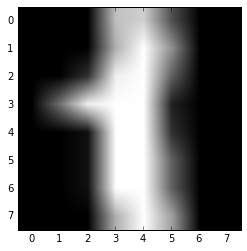

In [5]:
plt.imshow(x[1].reshape(8,8),cmap=plt.cm.gray)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [7]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.25,random_state = 1)

In [8]:
reg = LogisticRegression()
reg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [9]:
pred = reg.predict(x_test)

In [10]:
reg.score(x_test,y_test)*100

96.444444444444443

In [11]:
pd.DataFrame({'actual':y_test,'predicted':pred})

,actual,predicted
0,1,1
1,5,5
2,0,0
3,7,7
4,1,1
5,0,0
6,6,6
7,1,1
8,5,5
9,4,4


### Classification Metrics
Classification problems are perhaps the most common type of machine learning problem and as such there are a myriad of metrics that can be used to evaluate predictions for these problems.
In this section we will review how to use the following metrics:

• Classification Accuracy.

• Logarithmic Loss.

• Confusion Matrix.

• Classification Report.




In [13]:
from sklearn import model_selection

kfold = model_selection.KFold(n_splits=10,random_state = 7)

results = model_selection.cross_val_score(reg,x,y,cv=kfold,scoring='accuracy')

results

array([ 0.90555556,  0.95      ,  0.89444444,  0.91666667,  0.94444444,
        0.97222222,  0.97777778,  0.95530726,  0.8603352 ,  0.93854749])

In [18]:
results.sum()/10

0.93153010552451898

In [14]:
results = model_selection.cross_val_score(reg,x,y,cv=kfold,scoring='neg_log_loss')

results

array([-0.45780262, -0.14425175, -0.61747256, -0.27323632, -0.27567035,
       -0.12823357, -0.11021432, -0.12333149, -0.62655102, -0.68631191])

In [15]:
results.sum()/10

-0.34430759138037381

### Confusion Matrix


<img src = 'https://sebastianraschka.com/images/faq/multiclass-metric/conf_mat.png'/>

In [16]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test,pred))

[[51  0  0  0  2  0  0  0  0  0]
 [ 0 40  0  0  0  1  0  0  1  0]
 [ 0  1 39  1  0  0  0  0  0  0]
 [ 0  0  0 49  0  0  0  0  3  0]
 [ 0  0  0  0 47  0  0  0  0  0]
 [ 0  0  0  0  0 37  0  0  0  2]
 [ 0  0  0  0  0  0 43  0  0  0]
 [ 0  0  0  0  0  0  0 47  0  1]
 [ 0  0  0  0  0  1  0  0 35  1]
 [ 0  0  0  0  0  1  0  0  1 46]]


<img src = 'https://www.safaribooksonline.com/library/view/python-data-analysis/9781785282287/graphics/B04223_10_02.jpg'/>

#### Precision is a measure that tells us what proportion of patients that we diagnosed as having cancer, actually had cancer

- In our cancer example with 100 people, only 5 people have cancer. Let's say our model is very bad and predicts every case as Cancer. Since we are predicting everyone as having cancer, our denominator(True positives and False Positives) is 100 and the numerator, person having cancer and the model predicting his case as cancer is 5. So in this example, we can say that Precision of such model is 5%


#### Recall is a measure that tells us what proportion of patients that actually had cancer was diagnosed by the algorithm as having cancer.


- In our cancer example with 100 people, 5 people actually have cancer. Let's say that the model predicts every case as cancer. So our denominator(True positives and False Negatives) is 5 and the numerator, person having cancer and the model predicting his case as cancer is also 5(Since we predicted 5 cancer cases correctly). So in this example, we can say that the Recall of such model is 100%. And Precision of such a model(As we saw above) is 5%.



It is clear that recall gives us information about a classifiers performance with respect to false negatives (how many did we miss), while precision gives us information about its performance with respect to false positives(how many did we caught).
Precision is about being precise. So even if we managed to capture only one cancer case, and we captured it correctly, then we are 100% precise.
Recall is not so much about capturing cases correctly but more about capturing all cases that have cancer with the answer as cancer. So if we simply always say every case as cancer, we have 100% recall.
So basically if we want to focus more on minimising False Negatives, we would want our Recall to be as close to 100% as possible without precision being too bad and if we want to focus on minimizing False positives, then our focus should be to make Precision as close to 100% as possible.


In [26]:
from sklearn.metrics import classification_report

print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        37
          1       0.89      0.91      0.90        43
          2       0.95      0.93      0.94        44
          3       0.90      0.96      0.92        45
          4       0.97      1.00      0.99        38
          5       0.98      0.98      0.98        48
          6       0.96      1.00      0.98        52
          7       1.00      0.94      0.97        48
          8       0.93      0.90      0.91        48
          9       0.96      0.94      0.95        47

avg / total       0.95      0.95      0.95       450



In [28]:
results = model_selection.cross_val_score(reg,x,y,cv=kfold,scoring='r2')

results

array([ 0.73184699,  0.86942354,  0.81023661,  0.79423609,  0.82434177,
        0.94343263,  0.92524112,  0.90725247,  0.60169024,  0.82555495])

In [29]:
results.sum()/10

0.82332564041087808